# Exam 15th of August 2023, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city. The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals. The locations are divided into three regions: downtown, the suburbs, and the countryside, however there is always the possibility the truck breaks down and it goes to the workshop. The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability of transitioning to downtown | Probability of transitioning to the suburbs | Probability of transitioning to the countryside | Probability of transitioning to the Workshop |
|-|-|-|-|-|
| Downtown       | 0.3 | 0.7 | 0 | 0 |
| Suburbs        | 0.2 | 0.5 | 0.3 | 0 |
| Countryside    | 0 | 0 | 0.5 | 0.5 |
| Workshop    | 0 | 0 | 0 | 1 |

1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? [2p]
2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region **the first time** after three time steps or more? [2p]
3. Is this Markov chain irreducible? Explain your answer. [3p]
4. What is the stationary distribution? Furthermore it it reversible? (Explain your answer) [3p]
5. Advanced question: What is the expected number of steps it takes starting from the Downtown region to first reach the Workshop? Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 50. Motivate your answer in detail [4p]. You could also solve this question by simulation, but this gives you a maximum of [2p].



In [9]:
# Part 1
import numpy as np
P = np.matrix([[0.3, 0.7, 0, 0],
               [0.2, 0.5, 0.3, 0],
               [0, 0, 0.5, 0.5],
               [0, 0, 0, 1]])
p0 = np.matrix([[1, 0, 0, 0]])
print(p0.shape)
# Fill in the answer to part 1 below
print(p0*P**10)
problem1_p1 = (p0*P**10)[0, 2]
print(problem1_p1)

(1, 4)
[[0.03393523 0.08268291 0.08487353 0.79850833]]
0.08487353489999999


In [7]:
# Part 2

# Fill in the answer to part 2 below
problem1_p2 = 1 - (0.7*0.3)
print(problem1_p2)

0.79



## Part 3

Double click this cell to enter edit mode and write your answer for part 3 below this line.

### Definition irreducible markov chain
The state $j$ is said to be accesible from a state $i$ if there exists some $n\geq0$ such that: 
$$p^n_{ij} = P(X_n = j | X_0 = i) > 0$$

### Answer
In our example: Once the truck reaches the workshop it can't go anywhere else. Therfore the equation can't hold. Our markov chain is not irreducible.

In [ ]:
# Part 3

# Fill in the answer to part 3 below as a boolean
problem1_irreducible = False

In [13]:
# Part 4

# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!
eigenvalues, eigenvectors = np.linalg.eig(P.T)
print(eigenvalues)
problem1_stationary = eigenvectors[:, 0]/np.sum(eigenvectors[:, 0])
print(problem1_stationary)
problem1_reversible = False

[1.         0.5        0.78729833 0.01270167]
[[0.]
 [0.]
 [0.]
 [1.]]


# Part 4

Double click this cell and write your motivation below this line

Because the markov chain is not irreducible it can not be reversible.


## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.


In [10]:
# Part 5

# Fill in the answer to part 5 below
# That is, the expected number of steps

n = 50
# use decreased stationary/transition matrix for all steps before the last one
# remove row & column refering to state X
P1 = np.matrix([[0.3,0.7,0],[0.2,0.5,0.3],[0,0,0.5]])

# initial state - unit vector representing the start state given the reduced matrix
p0 = np.matrix((1,0,0)) 

# np.linalg.matrix_power(P1,t-1) - t-1 steps using only reduced P1 matrix
# t^th step: np.array([P[0,3],P[1,3],P[2,3]] is column of P, through which state X will be reached 
solution = np.sum([t*p0@np.linalg.matrix_power(P1,t-1)@np.array([P[0,3],P[1,3],P[2,3]]) for t in range(1,n)])
print(solution)
problem1_ET = solution

7.713315600321836


---
## Exam vB, PROBLEM 2
Maximum Points = 13


You are given a "Data Science Salaries" dataset found in `data/salaries.csv`, which contains employment information of data scientists up to 2023 and the salary obtained. Your task is to train a `linear regression` model to predict the salary of a data scientist based on the employment information.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

`Experience level`: 0 = Entry Level, 1 = Mid Level, 2 = Senior Level, 3 = Executive Level.

`Employment type`: 0 = Part Time, 1 = Full Time, 2 = Contractor, 3 = Freelancer

1. Load the data into a pandas dataframe `problem2_df`. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [1p]
2. Split the data into train and test. [1p]
3. Train the model. [1p]
4. Come up with a reasonable metric and compute it. Provide plots that show the performance of the model. Reason about the performance. [4p]
5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio. Then, looking at the output of `problem2_model.coef_`, which are the coefficients of the linear model, would a higher remote ratio result in a higher predicted salary or vice versa? [3p]
6. Advanced question: On the test set, plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). What does the confidence band tell us? What can the confidence band be used for? [3p]


In [14]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
import pandas as pd
problem2_df = pd.read_csv("data/salaries.csv")

In [16]:
problem2_df.head()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio
0,2023,2,1,85847,100
1,2023,1,2,30000,100
2,2023,1,2,25500,100
3,2023,2,1,175000,100
4,2023,2,1,120000,100


In [26]:
problem2_df.describe()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,1.645539,1.003462,137570.389880,46.271638
std,0.691448,0.678306,0.133550,63055.625278,48.589050
min,2020.000000,0.000000,0.000000,5132.000000,0.000000
25%,2022.000000,1.000000,1.000000,95000.000000,0.000000
50%,2022.000000,2.000000,1.000000,135000.000000,0.000000
75%,2023.000000,2.000000,1.000000,175000.000000,100.000000
max,2023.000000,3.000000,3.000000,450000.000000,100.000000


In [19]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem2_features = problem2_df.columns.tolist()[:-2] + ["remote_ratio"]
print(problem2_features)

# Fill in the target as a string with the correct column name

problem2_target = problem2_df.columns.tolist()[-2]
print(problem2_target)

['work_year', 'experience_level', 'employment_type', 'remote_ratio']
salary_in_usd


In [20]:
# Part 2
from sklearn.model_selection import train_test_split

# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(problem2_df[problem2_features], problem2_df[problem2_target], train_size=0.8, random_state=42)

In [21]:
# Part 3

# Include the necessary imports
from sklearn.linear_model import LinearRegression
# Initialize your linear regression model
problem2_model = LinearRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)

LinearRegression()

## Part 4

Double click this cell to enter edit mode and write your answer for part 4 below this line.

The $R^2$ score was choosen. It is defined as $1-\frac{u}{v}$ where $u$ is the residual sum of squares $\sum(y_true-y_pred)^2$ and $v$ is the total sum of squares $\sum (y_true-\mu)^2$. The best possible score is 1. A constant model always predicting the same value would have the score 0.

Score = 0.2 -> not good

Plots show underfitting


0.19926672357275688


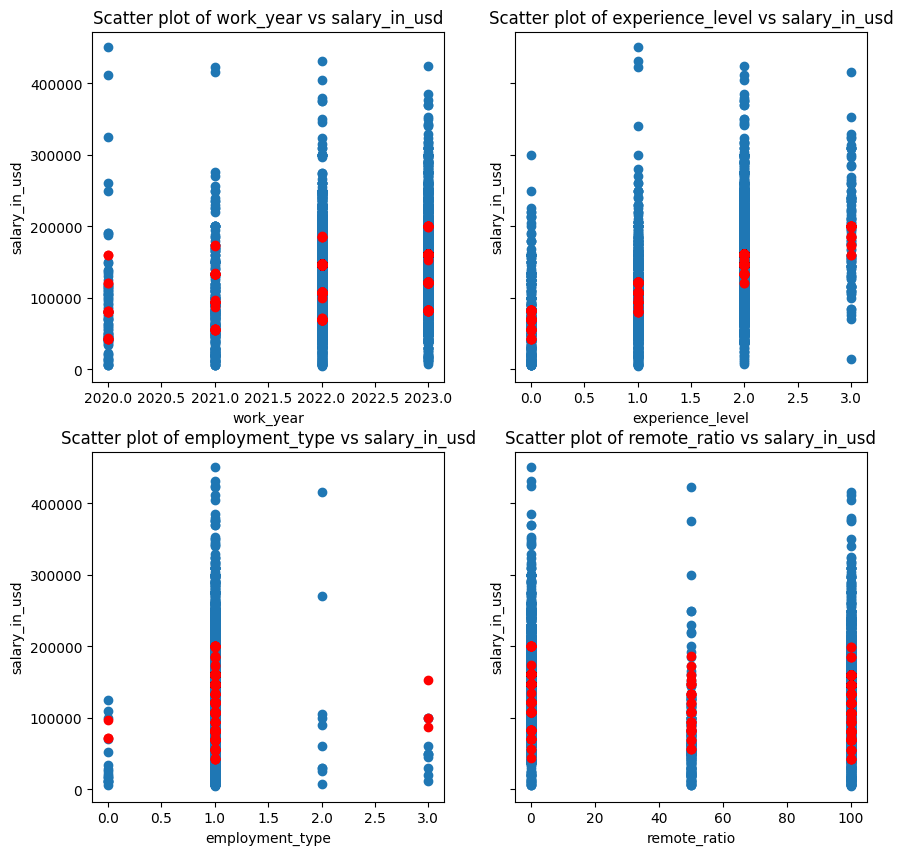

In [43]:
# Part 4
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Write the code to diagnose your model
score = problem2_model.score(problem2_X_test, problem2_y_test)
print(score)
#print(mean_squared_error(problem2_y_test, problem2_model.predict(problem2_X_test)))
fig, ax = plt.subplots(2, 2, sharey=True,  figsize=(10, 10))
ax = ax.ravel()
for i, col in enumerate(problem2_df[problem2_features].columns.to_list()):
    ax[i].scatter(problem2_df[col], problem2_df[problem2_target])
    ax[i].scatter(problem2_X_test[col], problem2_model.predict(problem2_X_test), color="red")
    ax[i].set_xlabel(col)
    ax[i].set_ylabel(problem2_target)
    ax[i].set_title("Scatter plot of {} vs {}".format(col, problem2_target))

0.19926672357275688


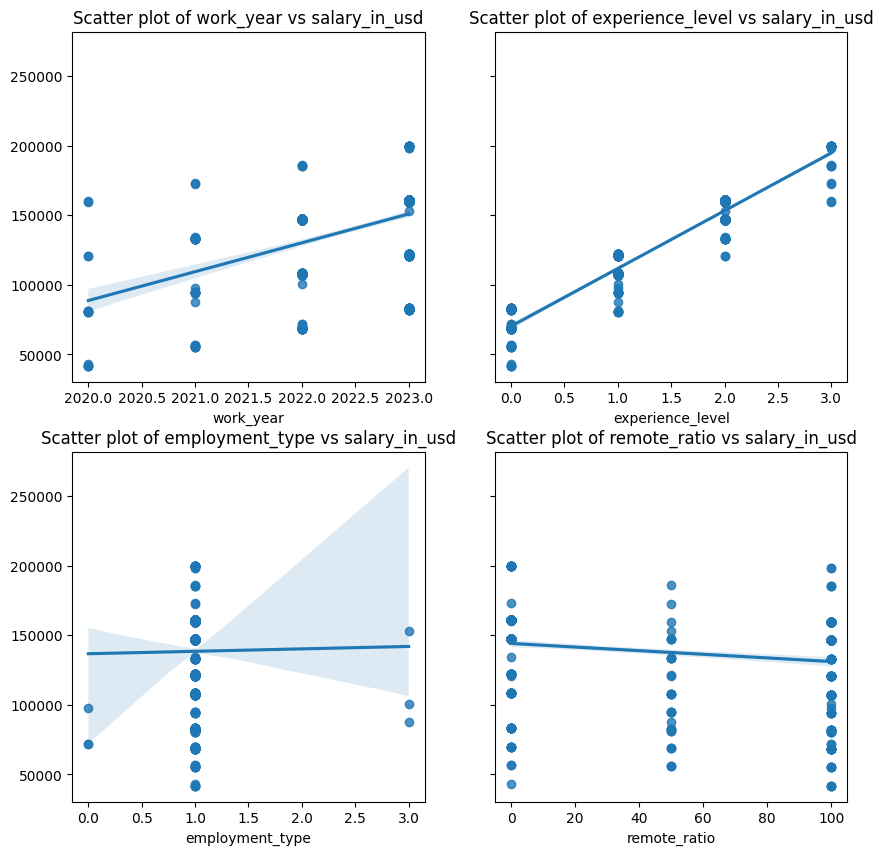

In [54]:
import seaborn as sns
# Part 4
# Write the code to diagnose your model
score = problem2_model.score(problem2_X_test, problem2_y_test)
print(score)
#print(mean_squared_error(problem2_y_test, problem2_model.predict(problem2_X_test)))
fig, ax = plt.subplots(2, 2, sharey=True,  figsize=(10, 10))
ax = ax.ravel()
for i, col in enumerate(problem2_features):
    sns.regplot(x=problem2_X_test[col], y=problem2_model.predict(problem2_X_test), ax=ax[i])
    ax[i].set_title("Scatter plot of {} vs {}".format(col, problem2_target))

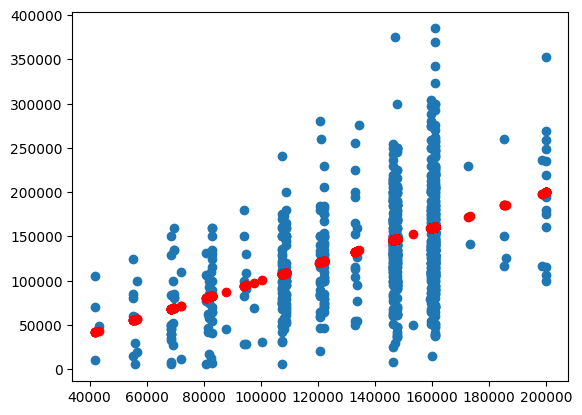

In [69]:
plt.scatter(problem2_model.predict(problem2_X_test),problem2_y_test)
plt.scatter(problem2_model.predict(problem2_X_test),problem2_model.predict(problem2_X_test), color="red")

## Part 5

Double click this cell to enter edit mode and write your answer for part 5 below this line.


In [66]:
# Part 5

# Put the code for part 5 below this line
X_pred = np.array([[2023, 1, 1, 0]])

In [68]:
# Part 5

problem2_predicted_salary = problem2_model.predict(X_pred)
print(problem2_predicted_salary)
print(problem2_model.coef_)  # remote_ratio coefficient is negative therefore a higher remote_ratio means a lower salary

[121940.38437092]
[ 1.3292e+04  3.8924e+04 -3.4790e+03 -1.3000e+01]


/home/just/code/uni/intro_ds/env/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



## Part 6

Double click this cell to enter edit mode and write your answer for part 6 below this line.



In [ ]:
# Part 6

# Put the code for part 6 below this line


---
## Exam vB, PROBLEM 3
Maximum Points = 13


## Random variable generation

1. [4p] Using inversion sampling, construct 1000 samples from the below distribution
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        e^x-1, & 0 < x < \ln(2) \\
        1, & x \geq \ln(2)
    \end{cases}
$$
2. [2p] Use the above 1000 samples to estimate the mean and variance
3. [4p] Using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) construct 1000 samples from the same distribution, what proposal distribution did you choose and why? What proportion of samples where accepted?
4. [3p] Explain if it is possible to sample from the density
$$
    f(x) = C e^{-(x^2-2)^2}
$$
using the **Accept-Reject** sampler (**Algorithm 1** in TFDS notes) with sampling density given the Gaussian. Here $C$ is a constant to make sure that $f$ is a density, it between roughly $1.34$ and $1.35$.

In [3]:
# Part 1
import numpy as np
# Write your code below
def problem3_function1(y):
    return np.log(y+1)

In [4]:
# Part 1

# Put the resulting samples into the following variable

problem3_samples = [problem3_function1(x) for x in np.random.uniform(0, 1, 1000)]
print(problem3_samples)

[0.6646944714824644, 0.31792888537143443, 0.2366111252357066, 0.6084658868840049, 0.5320037792513767, 0.39102201575020107, 0.5933778691986152, 0.34284517527698655, 0.37839724044383166, 0.24033686361282877, 0.002277133273956269, 0.035687918287321374, 0.6299241373346494, 0.6314827280011043, 0.453888234462784, 0.6793965286563715, 0.26791845223387944, 0.2645499871111458, 0.35858671979458284, 0.5536436721426249, 0.33810289007157535, 0.2773493293649559, 0.0653150940220956, 0.48169494630748466, 0.4666976495917088, 0.2520004691302841, 0.5298474968156038, 0.412522270546039, 0.31059773900775445, 0.5686398425035556, 0.3101444093706311, 0.32946218959426143, 0.4491143204372372, 0.20747761888834898, 0.5404934537004201, 0.6733151762864388, 0.27825340484117683, 0.5716348287947054, 0.5864741376242474, 0.1518435347955638, 0.23391841886344616, 0.4315112243201288, 0.38461291857248253, 0.04776306194585308, 0.49462979797309586, 0.5691710232868464, 0.4993767549905569, 0.3431537288990656, 0.44669386970121394,

In [5]:
# Part 2

problem3_mean = np.mean(problem3_samples)
print(problem3_mean)

problem3_variance = np.var(problem3_samples)
print(problem3_variance)

0.39048679118783064
0.03838449195907811


In [6]:
# Part 3
from random import random
# Write your code to solve the problem below

samples = []
rejections = 0
while (len(samples) < 1000):
    # We know that the ratio is 1 when x is in the circle and 0 if it is outside
    x = np.random.uniform(0, 1)
    if (x*0.7 <= problem3_function1(x)): # We are inside the function
        samples.append(x)
    else:
        rejections+=1

In [7]:
# Part 3

# Write your answer in this cell below

problem3_samples_accept_reject = samples
print(problem3_samples_accept_reject)
print(rejections)

# Put your answer for the proportion of samples accepted below

problem3_acceptance_rate = XXX

[0.479803680377792, 0.9125615578988385, 0.3042651167604602, 0.2977916297280486, 0.11668909905205449, 0.2138705767542569, 0.6393117718188379, 0.772584213836639, 0.460678897659174, 0.044999626783955304, 0.29565819282343564, 0.56779208614325, 0.2820744656597747, 0.8045240956580391, 0.5507798169648132, 0.8949515822250645, 0.4603467426320995, 0.07999288372827817, 0.23560593257783402, 0.8784262701791997, 0.049217558354504476, 0.3862358311330891, 0.9160810353982105, 0.4909216486930281, 0.521239445802634, 0.7451993633192064, 0.8327936120236392, 0.7154829125276164, 0.6043374753562374, 0.4277587553120372, 0.21544659770431163, 0.6434712356353203, 0.4424202122238642, 0.325020242450594, 0.7472512373763902, 0.03480995879400739, 0.10139025392525136, 0.593073167672145, 0.028026444468204015, 0.344089114898428, 0.1966986861103156, 0.2489186618593936, 0.7421778262872609, 0.49836501321349536, 0.8331046122780865, 0.6464716555434692, 0.001250420768083016, 0.17950486516586395, 0.4420572588283166, 0.163040717

NameError: name 'XXX' is not defined

# Part 3

Double click this cell and write you answer for part 3 below, explain what proposal distibution you chose and why you can choose it.


# Part 4

Double click this cell and write you answer for part 4 below, explain if the Gaussian works as a proposal distribution for this density.
